# STA365
Homework 1

$\textbf{Question 1}$
What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.

In [ ]:
Given information:
    Pr(pass) = 0.9
    Pr(quick|pass) = 0.6
    Pr(quick|fail) = 0.3
    
Pr(pass|quick) = Pr(pass)Pr(quick|pass) / Pr(quick)
    = Pr(pass)Pr(quick|pass) / (Pr(pass)Pr(quick|pass) + Pr(fail)Pr(quick|fail))
    = 0.94737

$\textbf{Question 2}$

Likelihood is a multinomial
$$ p(x|\theta, n) = \frac{n!}{x_1!x_2!...x_k!} \prod_{i=1}^{k} \theta_{i}^{x_i} = c \cdot \theta_{1}^{x_1}\theta_{2}^{x_2}...\theta_{k}^{x_k} $$

Prior is a Dirichlet distribution
$$p(\theta|\alpha) = \frac{1}{B(\alpha)}$$ where $B(\alpha) = \frac{\prod_{i=1}^{k} \Gamma(\alpha_i)}{\Gamma(\Sigma_{i=1}^{k} \alpha_i)}$
$$ = c'\cdot\theta_{1}^{\alpha_1 -1}\theta_{2}^{\alpha_2 -1}...\theta_{k}^{\alpha_k-1}$$

Hence, the posterior is 
$$\frac{p(x|\theta)p(\theta)}{p(x)} = \frac{(c \cdot \theta_{1}^{x_1}\theta_{2}^{x_2}...\theta_{k}^{x_k})(c'\cdot\theta_{1}^{\alpha_1 -1}\theta_{2}^{\alpha_2 -1}...\theta_{k}^{\alpha_k-1})}{c"}$$
$$ = \frac{(cc' \cdot \theta_{1}^{x_1+\alpha_1 -1}\theta_{2}^{x_2+\alpha_2 -1}...\theta_{k}^{x_k+\alpha_k -1}}{c"}$$
$$ = \frac{cc'}{c"} \prod_{i=1}^{k} \theta_{i}^{x_i+ \alpha_i -1}$$


$\Rightarrow p(\theta |x) \alpha \prod_{i=1}^{k} \theta_{i}^{x_i+ \alpha_i -1}
 \Rightarrow$ The posterior distritbution is a Dirichlet distribution with parameters $\alpha_i' = x_i +\alpha_i$ for $i=1,2,...,k$

$\textbf{Question 3}$
Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.figure_factory as ff

In [3]:
# Step 1: Generate Multinomial Distribution and Sample
np.random.seed(2411)  # For reproducibility

# Define the multinomial probabilities and number of trials
probabilities = [0.4, 0.35, 0.25]  # Probabilities for the three categories
n_trials = 100  # Number of trials

# Generate a sample from the multinomial distribution
sample = np.random.multinomial(n_trials, probabilities)

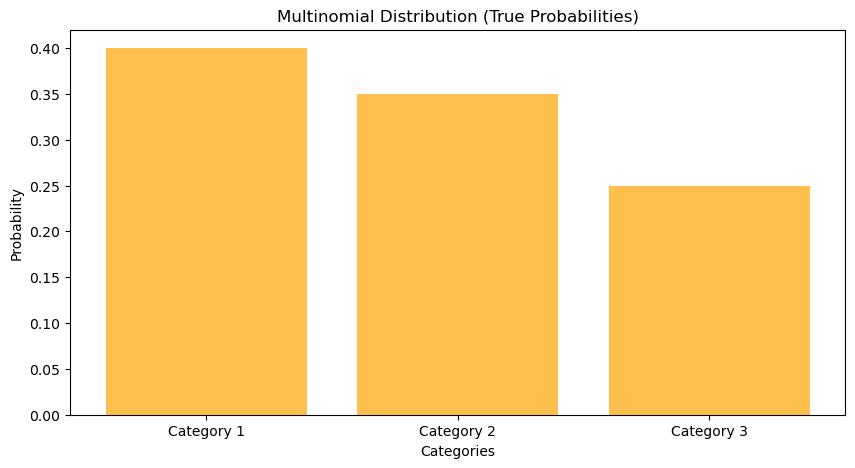

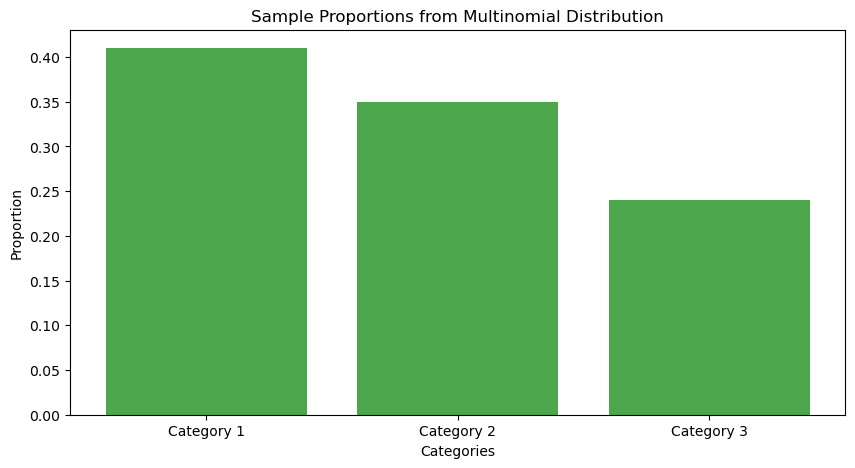

In [4]:
# Step 2: Visualize the Multinomial Distribution and the Sample
categories = ["Category 1", "Category 2", "Category 3"]

# Plot the multinomial probabilities (True Distribution)
plt.figure(figsize=(10, 5))
plt.bar(categories, probabilities, alpha=0.7, color='orange')
plt.title("Multinomial Distribution (True Probabilities)")
plt.ylabel("Probability")
plt.xlabel("Categories")
plt.show()

# Plot the sample proportions
plt.figure(figsize=(10, 5))
plt.bar(categories, sample / n_trials, alpha=0.7, color='green')
plt.title("Sample Proportions from Multinomial Distribution")
plt.ylabel("Proportion")
plt.xlabel("Categories")
plt.show()


In [7]:
# Step 3: Define and Visualize Dirichlet Prior and Posterior

# Define Dirichlet parameters (prior) and calculate posterior
alpha_prior = np.array([2, 2, 2])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

# Define a simplex grid for visualization
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# Plot Dirichlet prior using ternary plot
fig_prior = ff.create_ternary_contour(
    p.T, dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_prior.update_layout(title="Dirichlet Prior (Alpha = [2, 2, 2])")
fig_prior.show()

In [8]:
# Step 4: Compute and Visualize the Posterior Dirichlet
alpha_posterior = alpha_prior + sample  # Update prior with observed counts
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# Plot Dirichlet posterior using ternary plot
fig_posterior = ff.create_ternary_contour(
    p.T, dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_posterior.update_layout(title="Dirichlet Posterior")
fig_posterior.show()